In [1]:
import pyscan as ps

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3


def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2, and v3 devices. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage
    d.v2_readout = devices.v2.voltage
    d.v3_readout = devices.v3.voltage

    d.vsum = d.v1_readout + d.v2_readout + d.v3_readout
    
    return d

In [3]:
# Create RunInfo instance and set scan0 and scan1 to PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.05, 1)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

<function pyscan.general.killswitch.engage_killswitch(expt, hotkey='c', plotting_function=None, dt=0.1, *arg, **kwarg)>

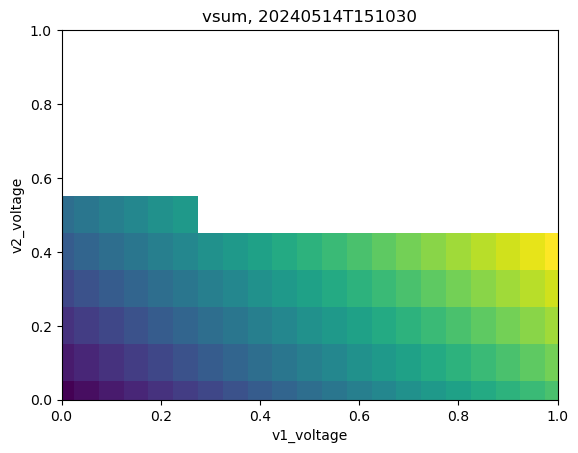

In [4]:
# This example includes a plotting function and so will plot while the kill switch is active.
# The killswitch defaults to the 'c' key. By pressing it you can stop the expt at any time.
ps.engage_kill_switch(expt, plotting_function=ps.live_plot2D, data_name="vsum")